In [1]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
target_db = 'dft-mot-results-and-test-items-2005-to-2020.sqlite'
con = sqlite3.connect(target_db)

In [71]:
df = pd.read_sql_query("""
    SELECT count(*) AS count
    FROM tests
""", con)
df

,count
0,551156668


In [72]:
total_tests = df['count'][0]

In [68]:
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con, index_col='make')
df

,count
make,
FORD,82828425
VAUXHALL,65070483
VOLKSWAGEN,42427312
PEUGEOT,33558312
RENAULT,29739403
TOYOTA,23105501
NISSAN,22162338
BMW,21396662
CITROEN,20749760


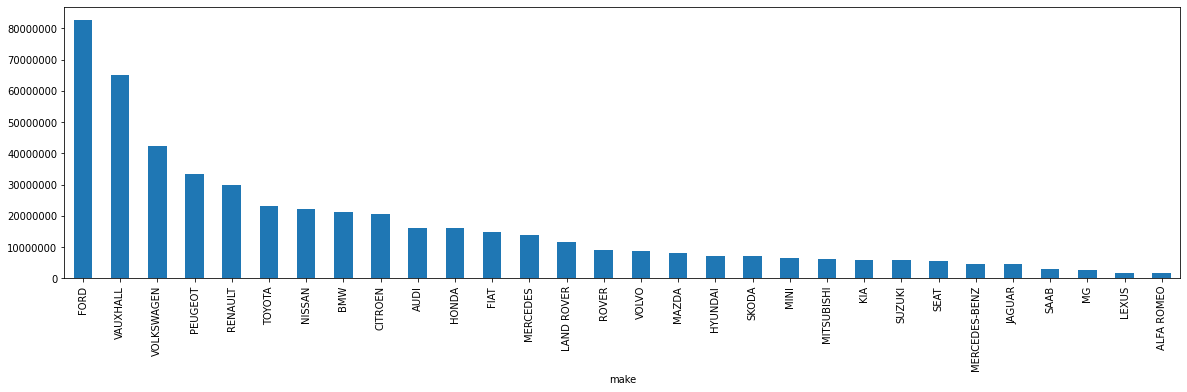

In [69]:
df.plot(kind='bar', figsize=(20,5), legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [20]:
df = pd.read_sql_query("""
    SELECT strftime('%Y', test_date) as year, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY year
    ORDER BY year
""", con)
df

,year,count
0,2005,7113089
1,2006,30302568
2,2007,31803974
3,2008,32591753
4,2009,33529083
5,2010,34179326
6,2011,34790696
7,2012,34831846
8,2013,35346508
9,2014,35458346


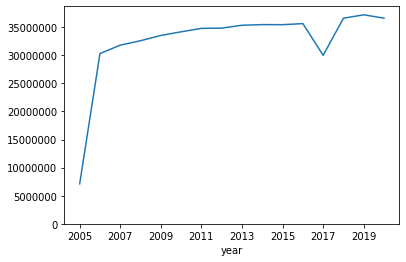

In [25]:
df_by_year = df.set_index(['year'])
df_by_year.plot(legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
plt.show()

In [79]:
df = pd.read_sql_query("""
    SELECT strftime('%m', test_date) as month, count(*) as count
    FROM tests
    WHERE
        test_class_id=4 AND test_date NOT LIKE '2015-%' AND test_date NOT LIKE '2017-%'
        AND test_type = 'NT'
    GROUP BY month
    ORDER BY month
""", con)
df

,month,count
0,01,27574827
1,02,28142573
2,03,36626436
3,04,28876966
4,05,30264132
5,06,31016903
6,07,30854740
7,08,30313535
8,09,35227304
9,10,32813613


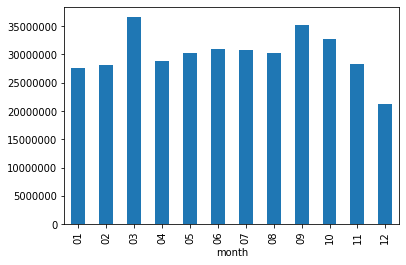

In [80]:
df_by_month = df.set_index(['month'])
df_by_month.plot(kind='bar', legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
plt.show()

In [81]:
df = pd.read_sql_query("""
    SELECT strftime('%m', test_date) as month, test_result, count(*) as count
    FROM tests
    WHERE test_class_id=4 AND test_date NOT LIKE '2015-%' AND test_date NOT LIKE '2017-%' AND test_type = 'NT'
    GROUP BY month, test_result
    ORDER BY month, test_result
""", con)
df

,month,test_result,count
0,01,ABA,46537
1,01,ABR,141578
2,01,ABRVE,15
3,01,F,7947319
4,01,P,17006690
...,...,...,...
67,12,ABR,119787
68,12,ABRVE,18
69,12,F,5786284
70,12,P,13330419


<AxesSubplot:xlabel='month'>

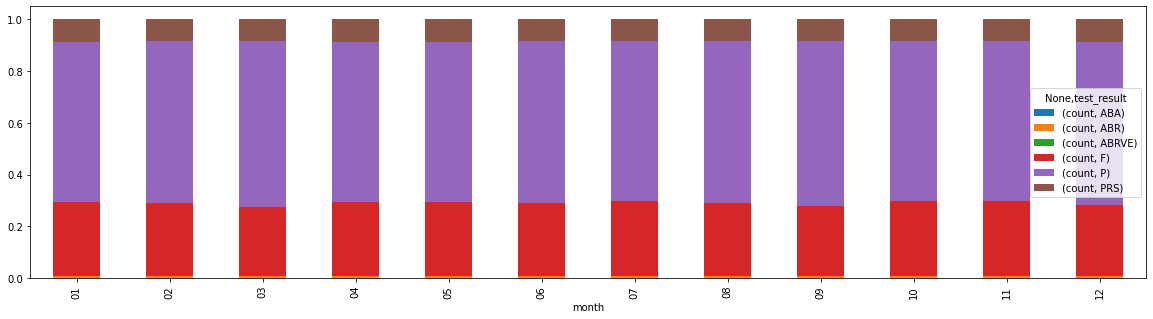

In [82]:
df_by_month = df.set_index(['month'])
df_by_month = df_by_month.pivot_table(index=df_by_month.index, columns='test_result')
df_by_month_normalized = df_by_month.div(df_by_month.sum(axis=1), axis=0)
df_by_month_normalized.plot.bar(stacked=True, figsize=(20,5))

In [4]:
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4 AND test_date LIKE '2020-%'
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con)
df.set_index(['make'], inplace=True)
df_top_2020 = df
df

,count
make,
FORD,5263460
VAUXHALL,3984485
VOLKSWAGEN,3343966
BMW,1851704
NISSAN,1797545
PEUGEOT,1795188
TOYOTA,1719119
AUDI,1702908
RENAULT,1357072


In [5]:
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4 AND test_date NOT LIKE '2015-%' AND test_date NOT LIKE '2017-%'
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con)
df.set_index(['make'], inplace=True)
df_top_overall = df
df

,count
make,
FORD,72896363
VAUXHALL,56898908
VOLKSWAGEN,36666182
PEUGEOT,29657876
RENAULT,26470206
TOYOTA,20083834
NISSAN,19458051
BMW,18483099
CITROEN,18124358


In [6]:
set(df_top_overall.index) - set(df_top_2020.index) 

{'ALFA ROMEO', 'MG', 'ROVER'}

In [7]:
set(df_top_2020.index) - set(df_top_overall.index)

{'CHEVROLET', 'DACIA', 'PORSCHE'}

In [9]:
makes = sorted(list(set(df_top_2020.index).union(set(df_top_overall.index))))
makes

['ALFA ROMEO',
 'AUDI',
 'BMW',
 'CHEVROLET',
 'CITROEN',
 'DACIA',
 'FIAT',
 'FORD',
 'HONDA',
 'HYUNDAI',
 'JAGUAR',
 'KIA',
 'LAND ROVER',
 'LEXUS',
 'MAZDA',
 'MERCEDES',
 'MERCEDES-BENZ',
 'MG',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'PEUGEOT',
 'PORSCHE',
 'RENAULT',
 'ROVER',
 'SAAB',
 'SEAT',
 'SKODA',
 'SUZUKI',
 'TOYOTA',
 'VAUXHALL',
 'VOLKSWAGEN',
 'VOLVO']

In [32]:
makes = ['ALFA ROMEO',
 'AUDI',
 'BMW',
 'CHEVROLET',
 'CITROEN',
 'DACIA',
 'FIAT',
 'FORD',
 'HONDA',
 'HYUNDAI',
 'JAGUAR',
 'KIA',
 'LAND ROVER',
 'LEXUS',
 'MAZDA',
 'MERCEDES',
 'MERCEDES-BENZ',
 'MG',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'PEUGEOT',
 'PORSCHE',
 'RENAULT',
 'ROVER',
 'SAAB',
 'SEAT',
 'SKODA',
 'SUZUKI',
 'TOYOTA',
 'VAUXHALL',
 'VOLKSWAGEN',
 'VOLVO']
make_str = ','.join(['?'] * len(makes))
df = pd.read_sql_query(f"""
    SELECT
        make,
        strftime('%Y', test_date) as year,
        CAST(count(*) FILTER (WHERE test_result = 'F') AS REAL) / CAST(count(*) AS REAL) AS fail_rate
    FROM
        tests
    WHERE
        test_class_id=4 AND test_date NOT LIKE '2015-%'
        AND make IN ({make_str})
    GROUP BY make, year
    ORDER BY make, year
""", con, params=makes)

In [33]:
df

,make,year,fail_rate
0,ALFA ROMEO,2005,0.241655
1,ALFA ROMEO,2006,0.237507
2,ALFA ROMEO,2007,0.252487
3,ALFA ROMEO,2008,0.266104
4,ALFA ROMEO,2009,0.275923
...,...,...,...
490,VOLVO,2016,0.218898
491,VOLVO,2017,0.214278
492,VOLVO,2018,0.215434
493,VOLVO,2019,0.208701


<AxesSubplot:xlabel='year'>

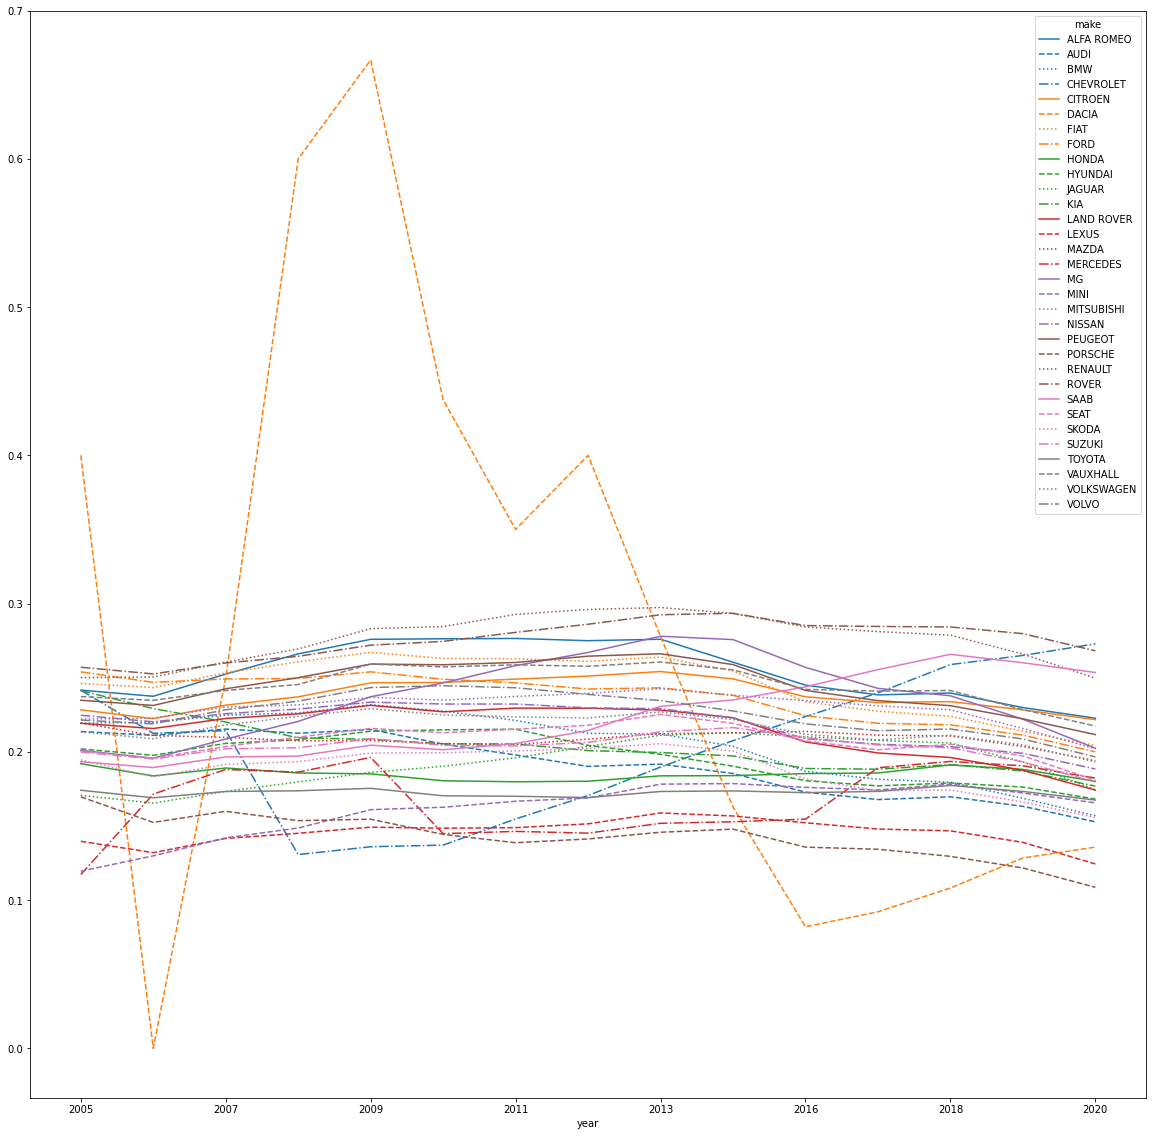

In [34]:
from cycler import cycler
df_pivoted = df.pivot(index='year', columns='make', values='fail_rate')
df_pivoted["MERCEDES"] + df_pivoted["MERCEDES-BENZ"]
df_pivoted["MERCEDES"] = (df_pivoted["MERCEDES"] + df_pivoted["MERCEDES-BENZ"]) / 2.0
df_pivoted.drop("MERCEDES-BENZ", axis=1, inplace=True)

# ax.set_prop_cycle(cycler('color', list('rbgykcm')) * cycler('linestyle', ['-', '--']))
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) * cycler(linestyle=['-', '--', ':', '-.']))
ax = plt.gca()
ax.set_prop_cycle(default_cycler)
df_pivoted.plot.line(figsize=(20,20), ax=ax)

In [63]:
df = pd.read_sql_query("""
    SELECT strftime('%Y', test_date) as year, count(*) AS count
    FROM tests
    WHERE test_class_id=4 AND make = 'DACIA'
    GROUP BY year
    ORDER BY year
""", con)
df

,year,count
0,2005,5
1,2006,3
2,2007,8
3,2008,5
4,2009,6
5,2010,16
6,2011,20
7,2012,25
8,2013,54
9,2014,172


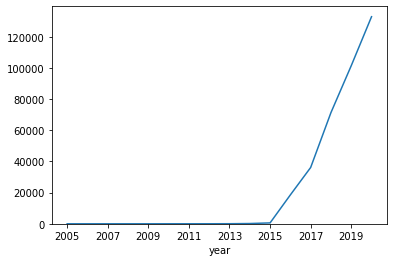

In [64]:
df_by_year = df.set_index(['year'])
df_by_year.plot(legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
plt.show()

In [7]:
df = pd.read_sql_query("""
    SELECT
        max(cast(test_mileage as real)),
        min(cast(test_mileage as real))
    FROM
        tests
    WHERE
        test_class_id=4 AND test_type = 'NT' AND test_date LIKE '2020-%' 
""", con)
df

,max(cast(test_mileage as real)),min(cast(test_mileage as real))
0,999999.0,0.0


In [40]:
df = pd.read_sql_query("""
    SELECT
        floor(test_mileage/1000.00)*1000 as bucket,
        count(*)
    FROM
        tests
    WHERE
        test_class_id=4 AND test_type = 'NT' AND test_date LIKE '2020-%' AND test_mileage != 0
    GROUP BY
        bucket
    ORDER BY
        bucket
""", con, index_col='bucket')
df

,count(*)
bucket,
0.0,886941
1000.0,13154
2000.0,20659
3000.0,29512
4000.0,39948
...,...
995000.0,6
996000.0,6
997000.0,4


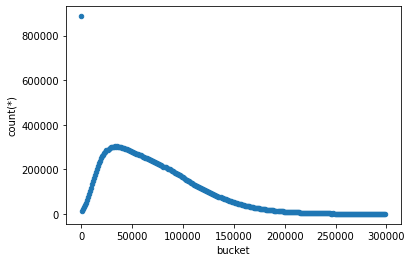

In [41]:
df.reset_index()[:300].plot.scatter(x='bucket', y='count(*)')
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

In [42]:
df = pd.read_sql_query("""
    SELECT
        floor(test_mileage/1000.00)*1000 as bucket,
        CAST(count(*) FILTER (WHERE test_result = 'F') AS REAL) / CAST(count(*) AS REAL) AS fail_rate,
        count(*)
    FROM
        tests
    WHERE
        test_class_id=4 AND test_type = 'NT' AND test_date LIKE '2020-%' AND test_mileage != 0
    GROUP BY
        bucket
    ORDER BY
        bucket
""", con, index_col='bucket')
df

,fail_rate,count(*)
bucket,,
0.0,0.034098,886941
1000.0,0.072373,13154
2000.0,0.052713,20659
3000.0,0.046795,29512
4000.0,0.046285,39948
...,...,...
995000.0,0.666667,6
996000.0,0.333333,6
997000.0,0.250000,4


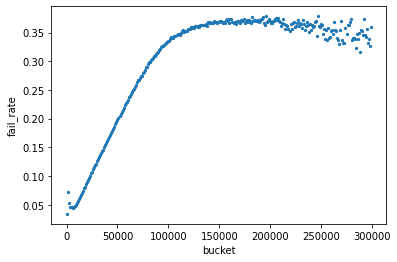

In [48]:
df.reset_index()[:300].plot.scatter(x='bucket', y='fail_rate',  marker='.')
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

In [22]:
makes = ['ALFA ROMEO',
 'AUDI',
 'BMW',
 'CHEVROLET',
 'CITROEN',
 'DACIA',
 'FIAT',
 'FORD',
 'HONDA',
 'HYUNDAI',
 'JAGUAR',
 'KIA',
 'LAND ROVER',
 'LEXUS',
 'MAZDA',
 'MERCEDES',
 'MERCEDES-BENZ',
 'MG',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'PEUGEOT',
 'PORSCHE',
 'RENAULT',
 'ROVER',
 'SAAB',
 'SEAT',
 'SKODA',
 'SUZUKI',
 'TOYOTA',
 'VAUXHALL',
 'VOLKSWAGEN',
 'VOLVO']
make_str = ','.join(['?'] * len(makes))
df = pd.read_sql_query(f"""
    SELECT
        make,
        CASE 
            WHEN test_mileage < 150000 THEN floor(test_mileage/1000.00)*1000
            ELSE 150000
        END AS bucket,
        CAST(count(*) FILTER (WHERE test_result = 'F') AS REAL) / CAST(count(*) AS REAL) AS fail_rate
    FROM
        tests
    WHERE
        test_class_id=4 AND test_type = 'NT' AND test_date LIKE '2020-%' AND test_mileage != 0
        AND make IN ({make_str})
    GROUP BY
        make, bucket
    ORDER BY
        make, bucket
""", con, params=makes)
df

,make,bucket,fail_rate
0,ALFA ROMEO,0.0,0.200000
1,ALFA ROMEO,1000.0,0.068966
2,ALFA ROMEO,2000.0,0.145833
3,ALFA ROMEO,3000.0,0.109375
4,ALFA ROMEO,4000.0,0.086957
...,...,...,...
4978,VOLVO,146000.0,0.346939
4979,VOLVO,147000.0,0.343961
4980,VOLVO,148000.0,0.365538
4981,VOLVO,149000.0,0.356608


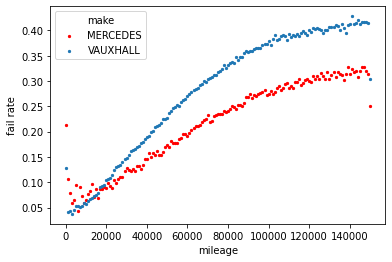

In [31]:
df_pivoted = df.pivot(index='bucket', columns='make', values='fail_rate').reset_index()
df_pivoted["MERCEDES"] + df_pivoted["MERCEDES-BENZ"]
df_pivoted["MERCEDES"] = (df_pivoted["MERCEDES"] + df_pivoted["MERCEDES-BENZ"]) / 2.0
df_pivoted.drop("MERCEDES-BENZ", axis=1, inplace=True)
df_pivoted
ax = plt.gca()
df_pivoted.plot.scatter(x='bucket', y='MERCEDES',  marker='.', color='red', ax=ax, label='MERCEDES')
df_pivoted.plot.scatter(x='bucket', y='VAUXHALL',  marker='.', ax=ax, label='VAUXHALL')
ax.set_xlabel("mileage")
ax.set_ylabel("fail rate")
ax.xaxis.get_major_formatter().set_scientific(False)